## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Импорт библиотек </h1> 

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, classification_report


## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Загрузка данных</h1> 

In [46]:
df = pd.read_csv('ClientsData.csv',  sep=',')
df

,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_DLQ_NUM,TARGET
0,49,1,0,1,2,1,5000.0,1,1,2,0
1,32,1,0,1,3,3,12000.0,1,1,1,0
2,52,1,0,1,4,0,9000.0,2,1,0,0
3,39,1,0,1,1,1,25000.0,1,1,3,0
4,30,1,0,0,0,0,12000.0,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
15218,25,1,0,0,1,1,12000.0,3,2,0,0
15219,51,1,0,1,2,0,10000.0,1,0,0,0
15220,22,1,0,1,1,1,6000.0,1,0,0,0
15221,60,0,1,1,2,0,4500.0,1,0,0,0


```
• AGE — возраст клиента;
• SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
• SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
• GENDER — пол клиента (1 — мужчина, 0 — женщина);
• CHILD_TOTAL — количество детей клиента;
• DEPENDANTS — количество иждивенцев клиента;
• PERSONAL_INCOME — личный доход клиента (в рублях);
• LOAN_NUM_TOTAL — количество ссуд клиента;
• LOAN_NUM_CLOSED — количество погашенных ссуд клиента.
• TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
```

In [47]:
print("Размер датасета:", df.shape)
print("Пропущенные значения:")
print(df.isnull().sum())


Размер датасета: (15223, 11)
Пропущенные значения:
AGE                  0
SOCSTATUS_WORK_FL    0
SOCSTATUS_PENS_FL    0
GENDER               0
CHILD_TOTAL          0
DEPENDANTS           0
PERSONAL_INCOME      0
LOAN_NUM_TOTAL       0
LOAN_NUM_CLOSED      0
LOAN_DLQ_NUM         0
TARGET               0
dtype: int64


## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> EDA</h1> 

In [48]:
df.describe().T.style.background_gradient(cmap='YlOrRd')

,count,mean,std,min,25%,50%,75%,max
AGE,15223.000000,40.406096,11.601068,21.000000,30.000000,39.000000,50.000000,67.000000
SOCSTATUS_WORK_FL,15223.000000,0.909610,0.286748,0.000000,1.000000,1.000000,1.000000,1.000000
SOCSTATUS_PENS_FL,15223.000000,0.134468,0.341165,0.000000,0.000000,0.000000,0.000000,1.000000
GENDER,15223.000000,0.654536,0.475535,0.000000,0.000000,1.000000,1.000000,1.000000
CHILD_TOTAL,15223.000000,1.099389,0.995411,0.000000,0.000000,1.000000,2.000000,10.000000
DEPENDANTS,15223.000000,0.645208,0.812252,0.000000,0.000000,0.000000,1.000000,7.000000
PERSONAL_INCOME,15223.000000,13853.836323,9015.467617,24.000000,8000.000000,12000.000000,17000.000000,250000.000000
LOAN_NUM_TOTAL,15223.000000,1.387769,0.793566,1.000000,1.000000,1.000000,2.000000,11.000000
LOAN_NUM_CLOSED,15223.000000,0.751889,0.988499,0.000000,0.000000,0.000000,1.000000,11.000000
LOAN_DLQ_NUM,15223.000000,0.195362,0.685022,0.000000,0.000000,0.000000,0.000000,13.000000


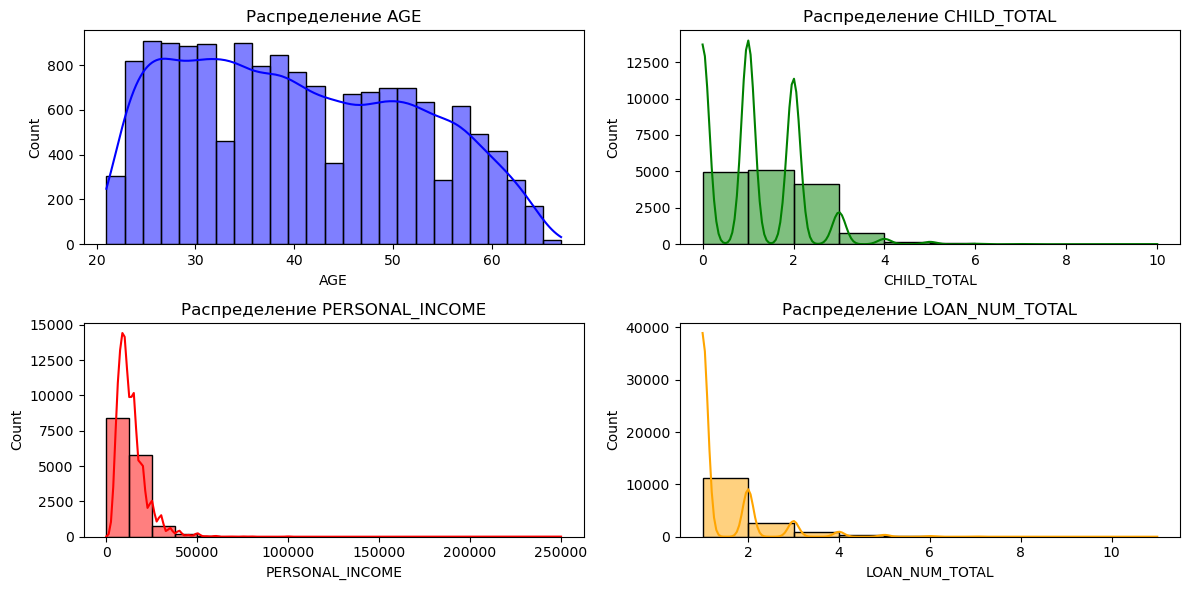

In [49]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['AGE'], bins=25, kde=True, color='blue')
plt.title('Распределение AGE')

plt.subplot(2, 2, 2)
sns.histplot(df['CHILD_TOTAL'], bins=10, kde=True, color='green')
plt.title('Распределение CHILD_TOTAL')

plt.subplot(2, 2, 3)
sns.histplot(df['PERSONAL_INCOME'], bins=20, kde=True, color='red')
plt.title('Распределение PERSONAL_INCOME')

plt.subplot(2, 2, 4)
sns.histplot(df['LOAN_NUM_TOTAL'], bins=10, kde=True, color='orange')
plt.title('Распределение LOAN_NUM_TOTAL')

plt.tight_layout()
plt.show()


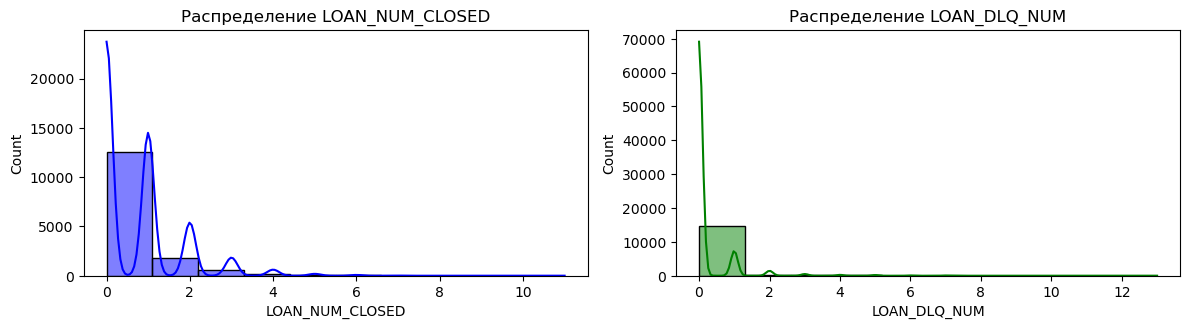

In [50]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['LOAN_NUM_CLOSED'], bins=10, kde=True, color='blue')
plt.title('Распределение LOAN_NUM_CLOSED')

plt.subplot(2, 2, 2)
sns.histplot(df['LOAN_DLQ_NUM'], bins=10, kde=True, color='green')
plt.title('Распределение LOAN_DLQ_NUM')

plt.tight_layout()
plt.show()


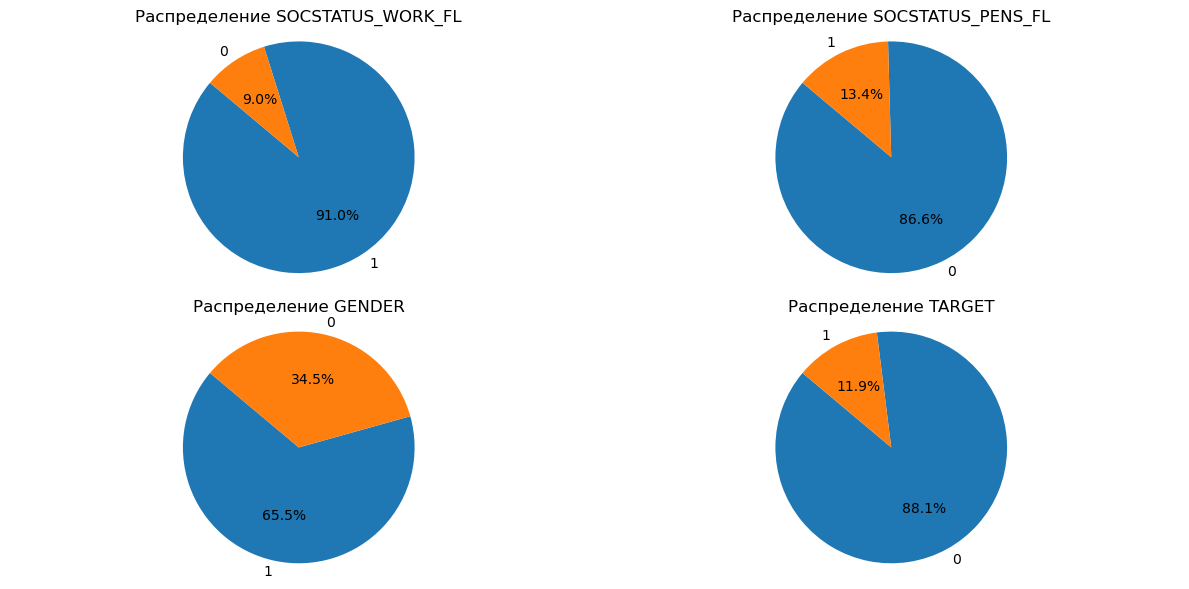

In [51]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.pie(df['SOCSTATUS_WORK_FL'].value_counts(), labels=df['SOCSTATUS_WORK_FL'].unique(), 
autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Распределение SOCSTATUS_WORK_FL')

plt.subplot(2, 2, 2)
plt.pie(df['SOCSTATUS_PENS_FL'].value_counts(), labels=df['SOCSTATUS_PENS_FL'].unique(), 
autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Распределение SOCSTATUS_PENS_FL')

plt.subplot(2, 2, 3)
plt.pie(df['GENDER'].value_counts(), labels=df['GENDER'].unique(), 
autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Распределение GENDER')

plt.subplot(2, 2, 4)
plt.pie(df['TARGET'].value_counts(), labels=df['TARGET'].unique(), 
autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Распределение TARGET')

plt.tight_layout()
plt.show()


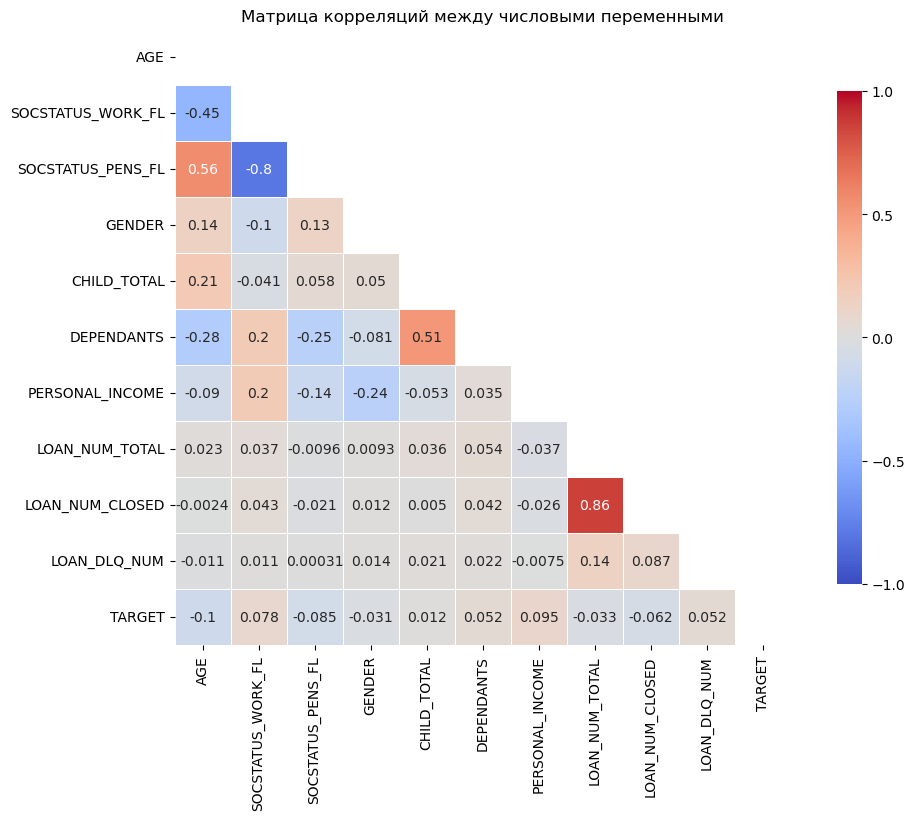

In [52]:
df_numeric = df.select_dtypes(include=['number']).copy()

correlation_matrix = df_numeric.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, 
            square=True, linewidths=.5, annot_kws={"size": 10}, 
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()


## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Подготовка данных</h1> 

In [53]:
# Избавимся от выбросов в поле зарплаты
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'PERSONAL_INCOME')


In [54]:
# Удалим сильно коррелирующее поля LOAN_NUM_TOTAL
df = df.drop(columns=['LOAN_NUM_TOTAL'])


In [65]:
# Нормализуем признаки
X = df.drop(columns=['TARGET'])
y = df['TARGET']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [66]:
# Разделяем данные на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")


Размер X_train: (11792, 9)
Размер X_test: (2948, 9)
Размер y_train: (11792,)
Размер y_test: (2948,)


In [67]:
# Балансировка данных с помощью SMOTE чтобы уровнять количество объектов класса 0 и 1
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


## <h1 id="aa" style="color:white;background:#B00000;padding:8px;border-radius:8px;font-family:newtimeroman;"> Обучение моделей</h1> 

### <h1 id="aa" style="color:white;background:#42aaff;padding:8px;border-radius:8px;font-family:newtimeroman;"> Логистическая регрессия</h1> 

In [68]:
model = LogisticRegression(random_state=42, max_iter=10_000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.59
Precision: 0.14
Recall: 0.51
F1-Score: 0.22

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.60      0.72      2614
           1       0.14      0.51      0.22       334

    accuracy                           0.59      2948
   macro avg       0.52      0.55      0.47      2948
weighted avg       0.82      0.59      0.66      2948



### <h1 id="aa" style="color:white;background:#42aaff;padding:8px;border-radius:8px;font-family:newtimeroman;"> MLP </h1> 

In [69]:
mlp = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25), 
    max_iter=5_000, 
    activation='relu', 
    solver='adam', 
    random_state=42
    )
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.20
Precision: 0.12
Recall: 0.96
F1-Score: 0.21

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.11      0.19      2614
           1       0.12      0.96      0.21       334

    accuracy                           0.20      2948
   macro avg       0.54      0.53      0.20      2948
weighted avg       0.86      0.20      0.20      2948



### <h1 id="aa" style="color:white;background:#42aaff;padding:8px;border-radius:8px;font-family:newtimeroman;"> Результаты </h1> 

1) Accuracy (точность) логистической регрессии значительно выше, что указывает на то, что она предсказывает больше правильных значений в целом (0.59 против 0.2 у MLP).

2) Recall (Полнота) у MLPClassifier гораздо выше (0.96 против 0.51 у лог.регрессии). Это означает, что MLPClassifier лучше распознает все положительные случаи, что может быть важным в случаях, где важно захватить все случаи положительного класса.

3) Если важно правильно распознать все положительные случаи лучше использовать MLPClassifier, если важно минимизировать ложные срабатывания - логистическую регрессию.